In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('flattened_order_data.csv')

In [3]:
df.head()

CUSTOMER_ID    ORDER_ID  STORE_NUMBER ORDER_CREATED_DATE  \
0    362204699  7247194287          2156         2024-07-24   
1    362204699  7247194287          2156         2024-07-24   
2    362204699  7247194287          2156         2024-07-24   
3    362204699  7247194287          2156         2024-07-24   
4    269612955   791214421          1419         2025-02-15   

  ORDER_CHANNEL_NAME ORDER_OCCASION_NAME                  item_name  \
0            Digital                ToGo        Order Memo Not Paid   
1            Digital                ToGo  10 pc Grilled Wings Combo   
2            Digital                ToGo   8 pc Grilled Wings Combo   
3            Digital                ToGo     8 pc Spicy Wings Combo   
4            Digital                ToGo        Ranch Dip - Regular   

   item_price  item_quantity  
0        0.00              1  
1       15.29              1  
2       13.29              1  
3       10.99              1  
4        1.59              1

In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())

Shape: (5657827, 9)
Columns: ['CUSTOMER_ID', 'ORDER_ID', 'STORE_NUMBER', 'ORDER_CREATED_DATE', 'ORDER_CHANNEL_NAME', 'ORDER_OCCASION_NAME', 'item_name', 'item_price', 'item_quantity']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657827 entries, 0 to 5657826
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   CUSTOMER_ID          int64  
 1   ORDER_ID             int64  
 2   STORE_NUMBER         int64  
 3   ORDER_CREATED_DATE   object 
 4   ORDER_CHANNEL_NAME   object 
 5   ORDER_OCCASION_NAME  object 
 6   item_name            object 
 7   item_price           float64
 8   item_quantity        int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 388.5+ MB
None


In [5]:
print(df.isnull().sum())

CUSTOMER_ID            0
ORDER_ID               0
STORE_NUMBER           0
ORDER_CREATED_DATE     0
ORDER_CHANNEL_NAME     0
ORDER_OCCASION_NAME    0
item_name              0
item_price             0
item_quantity          0
dtype: int64


In [6]:
for col in df.columns:
    print(f"{col} → {df[col].nunique()} unique values")

CUSTOMER_ID → 563346 unique values
ORDER_ID → 1414410 unique values
STORE_NUMBER → 38 unique values
ORDER_CREATED_DATE → 446 unique values
ORDER_CHANNEL_NAME → 1 unique values
ORDER_OCCASION_NAME → 2 unique values
item_name → 145 unique values
item_price → 4299 unique values
item_quantity → 60 unique values


In [7]:
order_item_counts = df.groupby("ORDER_ID").size()
print(order_item_counts.describe())

count    1.414410e+06
mean     4.000132e+00
std      2.106210e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      1.900000e+01
dtype: float64


In [8]:
df['item_total'] = df['item_price'] * df['item_quantity']
order_totals = df.groupby("ORDER_ID")['item_total'].sum()
print(order_totals.describe())

count    1.414410e+06
mean     4.168746e+01
std      4.913457e+02
min      0.000000e+00
25%      1.688000e+01
50%      2.356000e+01
75%      3.945000e+01
max      3.004956e+05
Name: item_total, dtype: float64


In [9]:
print(df['item_name'].value_counts().head(10))

item_name
Order Memo Paid              1327317
Order Memo Item               355697
Order Blankline 2             355674
Order Blankline 1             355674
Order Memo ASAP               323367
Ranch Dip - Regular           303183
20pc Spicy Feast Deal         268020
10 pc Grilled Wings Combo     166703
6 pc Grilled Wings Combo      117924
8 pc Grilled Wings Combo      117620
Name: count, dtype: int64


In [10]:
customer_orders = df.groupby("CUSTOMER_ID")['ORDER_ID'].nunique()
print(customer_orders.describe())

count    563346.000000
mean          2.510731
std           5.147438
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2802.000000
Name: ORDER_ID, dtype: float64


In [11]:
df['ORDER_CREATED_DATE'] = pd.to_datetime(df['ORDER_CREATED_DATE'])
df['ORDER_CREATED_DATE'].dt.month.value_counts().sort_index()

ORDER_CREATED_DATE
1     311724
2     778877
3     978561
4     892849
5     527325
6     435169
7     312591
8     287557
9     302212
10    271583
11    285592
12    273787
Name: count, dtype: int64

In [14]:
df['item_name'].unique()

array(['Order Memo Not Paid', '10 pc Grilled Wings Combo',
       '8 pc Grilled Wings Combo', '8 pc Spicy Wings Combo',
       'Ranch Dip - Regular', '50 pc Grilled Wings',
       'Regular Buffalo Fries', 'Order Memo Paid',
       '20pc Spicy Feast Deal', 'Order Memo Item', '20 pc Grilled Wings',
       'Order Memo ASAP', 'Order Blankline 2', 'Order Blankline 1',
       '6 pc Grilled Wings Combo', '10 pc Grilled Wings',
       'Fried Corn - Regular', 'Ranch Dip - Large', 'Veggie Sticks Spicy',
       'Flavor Platter', 'Large Fruit Punch',
       'Honey Mustard Dip - Regular', 'Voodoo Fries - Regular',
       '10 pc Spicy Wings', '2 pc Crispy Strips', 'Add 5 Grilled Wings',
       '24 pc Family Grilled Wings', '6 pc Spicy Wings Combo',
       'Chicken Sub Combo', '15 pc Spicy Wings',
       '10 pc Spicy Wings Combo', 'Add 5 Spicy Wings',
       'Blue Cheese Dip - Regular', 'Chicken Sub',
       '30 pc Family Grilled Wings', 'Order Memo Future',
       '10 pc Mixed Wings Combo', 'Dipping

In [15]:
non_menu_items = [
    'Order Memo Paid', 'Order Memo Not Paid', 'Order Memo Item',
    'Order Memo ASAP', 'Order Memo Future',
    'Order Blankline 1', 'Order Blankline 2',
    'Plastic Fork', 'Plastic Utensils', 'Plastic Straw', 'Plastic Knife',
    'Ketchup Pack', 'Seasoning Pack',
    'Drink Upgrade', 'Delivery Fee',
    'Unavailable Item'
]

df_cleaned = df[~df['item_name'].isin(non_menu_items)]

In [16]:
df_cleaned['item_name'].nunique()

129

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

### Univariate Analysis

C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_22088\4068236338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='coolwarm')


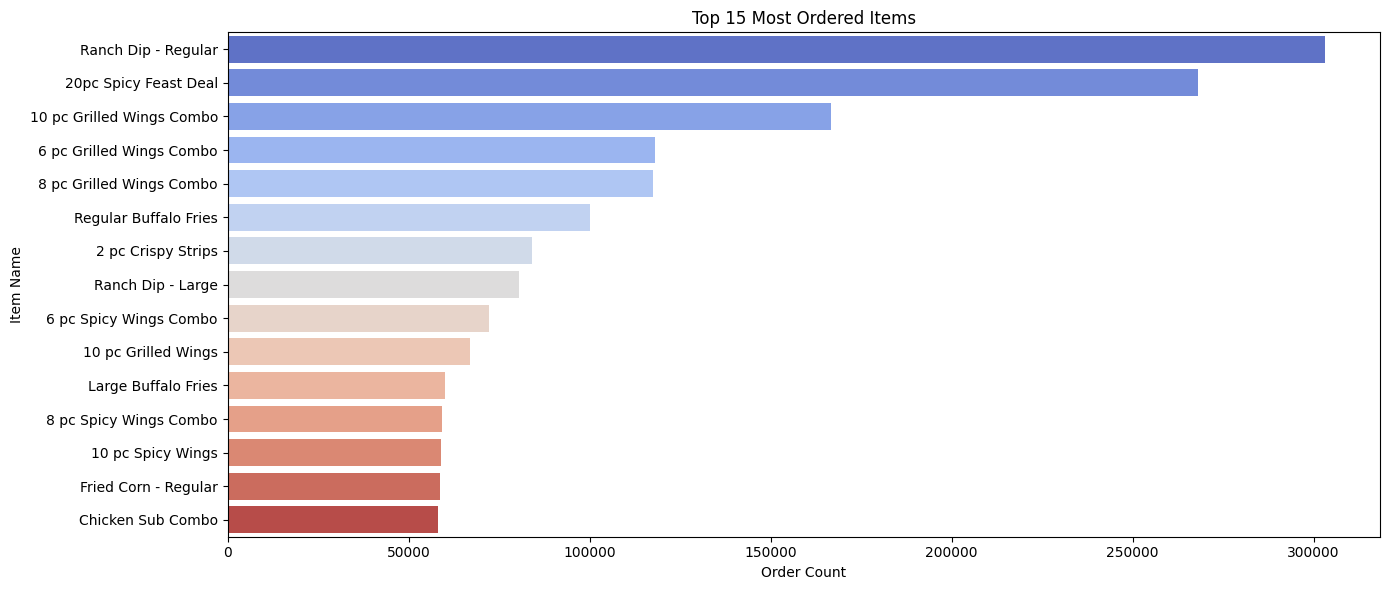

In [18]:
plt.figure(figsize=(14,6))
top_items = df_cleaned['item_name'].value_counts().head(15)
sns.barplot(x=top_items.values, y=top_items.index, palette='coolwarm')
plt.title("Top 15 Most Ordered Items")
plt.xlabel("Order Count")
plt.ylabel("Item Name")
plt.tight_layout()
plt.show()


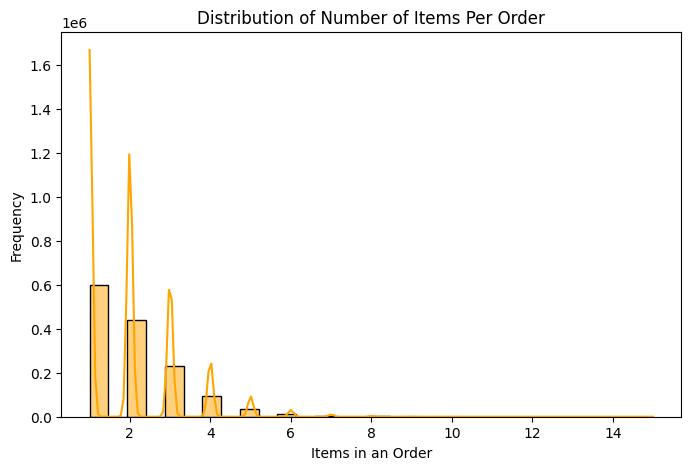

In [20]:
order_sizes = df_cleaned.groupby('ORDER_ID')['item_name'].count()

plt.figure(figsize=(8,5))
sns.histplot(order_sizes, bins=30, kde=True, color='orange')
plt.title("Distribution of Number of Items Per Order")
plt.xlabel("Items in an Order")
plt.ylabel("Frequency")
plt.show()

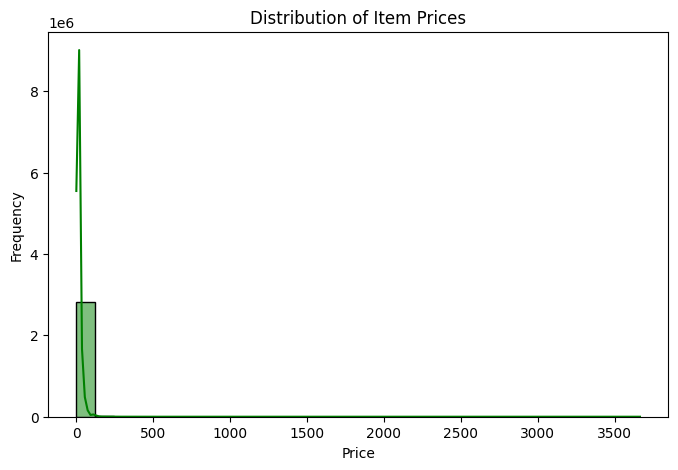

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['item_price'], bins=30, kde=True, color='green')
plt.title("Distribution of Item Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_22088\2412298942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['item_revenue'] = df_cleaned['item_price'] * df_cleaned['item_quantity']
C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_22088\2412298942.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_items.values, y=top_revenue_items.index, palette='viridis')


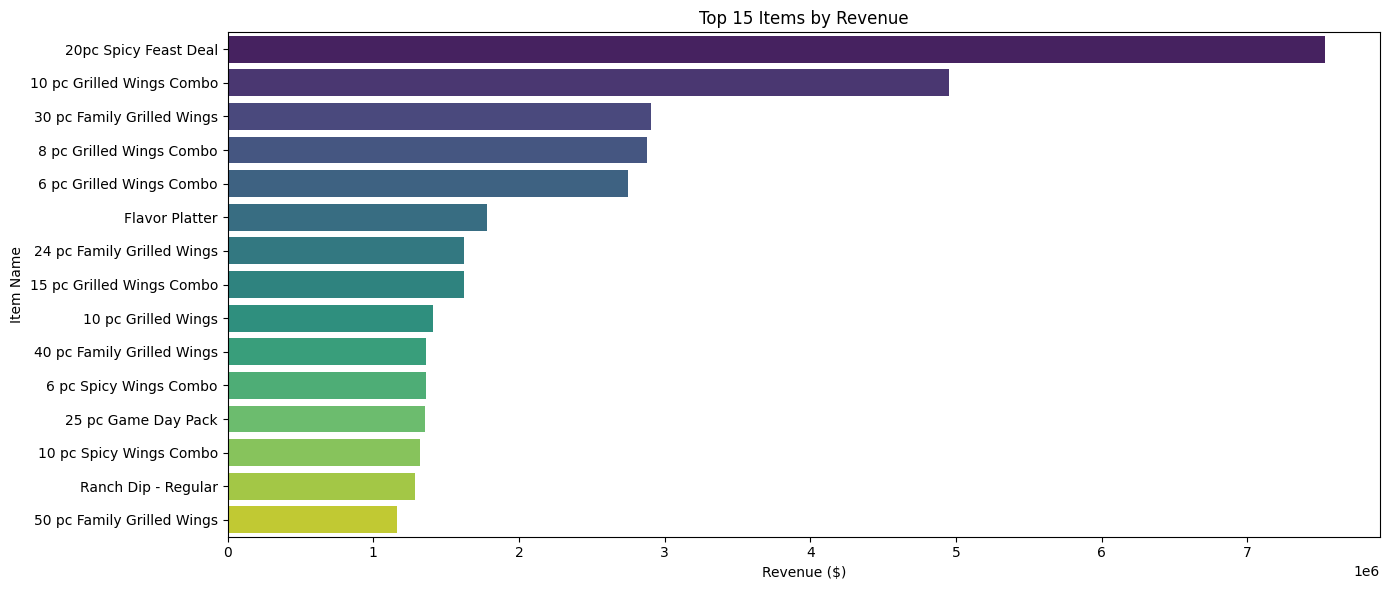

In [25]:
df_cleaned['item_revenue'] = df_cleaned['item_price'] * df_cleaned['item_quantity']
top_revenue_items = df_cleaned.groupby('item_name')['item_revenue'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14,6))
sns.barplot(x=top_revenue_items.values, y=top_revenue_items.index, palette='viridis')
plt.title("Top 15 Items by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Item Name")
plt.tight_layout()
plt.show()

C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_22088\3733815542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ORDER_CREATED_DATE'] = pd.to_datetime(df_cleaned['ORDER_CREATED_DATE'])
C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_22088\3733815542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = df_cleaned['ORDER_CREATED_DATE'].dt.month
C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_22088\3733815542.py:3: SettingWithCopyWarning: 
A value is trying to b

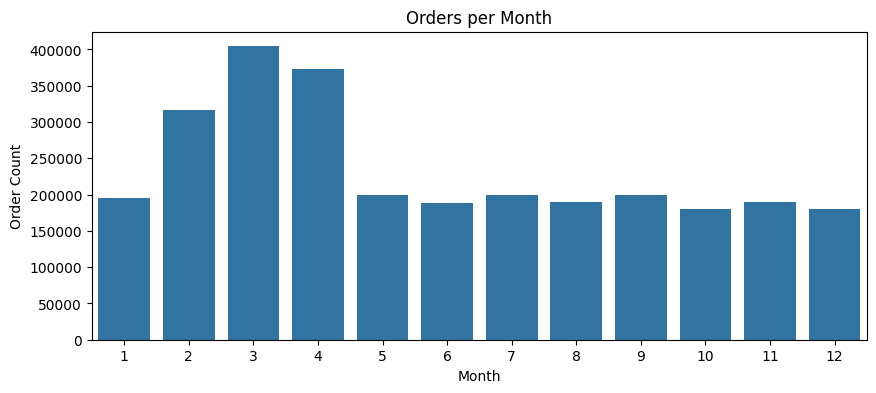

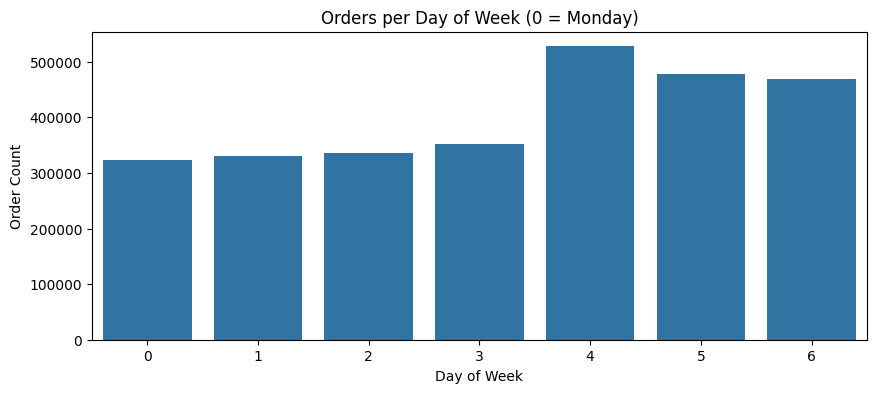

In [26]:
df_cleaned['ORDER_CREATED_DATE'] = pd.to_datetime(df_cleaned['ORDER_CREATED_DATE'])
df_cleaned['month'] = df_cleaned['ORDER_CREATED_DATE'].dt.month
df_cleaned['day'] = df_cleaned['ORDER_CREATED_DATE'].dt.dayofweek
df_cleaned['hour'] = df_cleaned['ORDER_CREATED_DATE'].dt.hour  # optional if timestamps exist

# Monthly Orders
plt.figure(figsize=(10,4))
sns.countplot(x='month', data=df_cleaned)
plt.title("Orders per Month")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.show()

# Orders per Day of Week
plt.figure(figsize=(10,4))
sns.countplot(x='day', data=df_cleaned)
plt.title("Orders per Day of Week (0 = Monday)")
plt.xlabel("Day of Week")
plt.ylabel("Order Count")
plt.show()

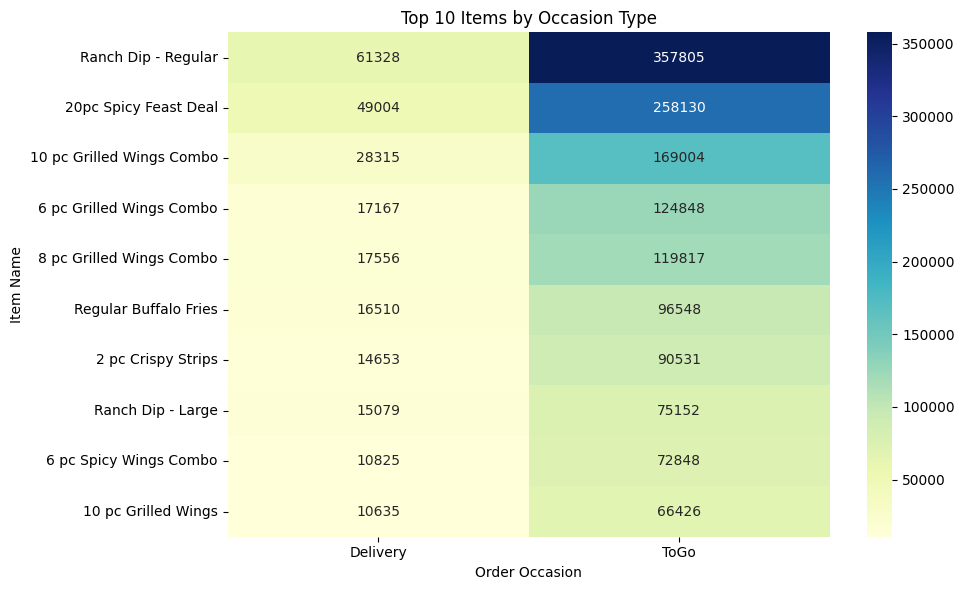

In [27]:
heat_df = df_cleaned.pivot_table(
    index='item_name',
    columns='ORDER_OCCASION_NAME',
    values='item_quantity',
    aggfunc='sum'
).fillna(0).sort_values(by='ToGo', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.heatmap(heat_df, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Top 10 Items by Occasion Type")
plt.xlabel("Order Occasion")
plt.ylabel("Item Name")
plt.tight_layout()
plt.show()


C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_22088\2679101633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ORDER_CREATED_DATE'] = pd.to_datetime(df_cleaned['ORDER_CREATED_DATE'])


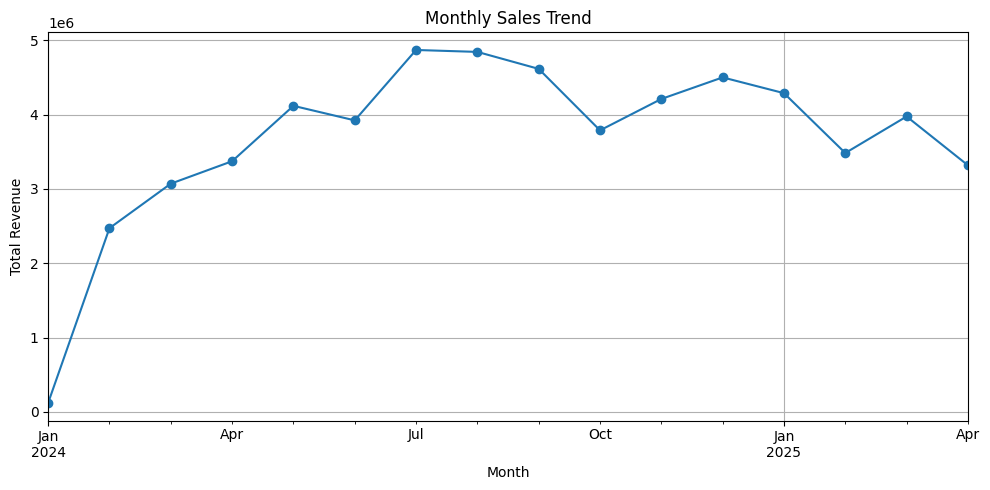

In [28]:
df_cleaned['ORDER_CREATED_DATE'] = pd.to_datetime(df_cleaned['ORDER_CREATED_DATE'])
monthly_sales = df_cleaned.groupby(df_cleaned['ORDER_CREATED_DATE'].dt.to_period('M'))['item_revenue'].sum()

monthly_sales.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


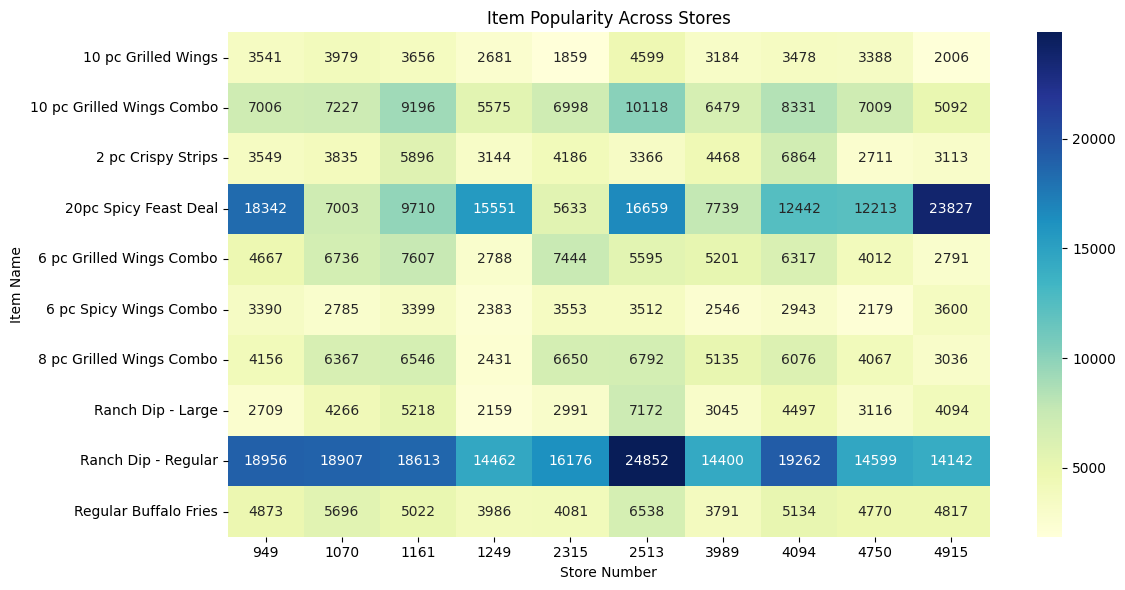

In [29]:
top_items = df_cleaned['item_name'].value_counts().head(10).index
top_stores = df_cleaned['STORE_NUMBER'].value_counts().head(10).index

pivot = df_cleaned[df_cleaned['item_name'].isin(top_items) & df_cleaned['STORE_NUMBER'].isin(top_stores)]
heatmap_data = pivot.pivot_table(index='item_name', columns='STORE_NUMBER', values='item_quantity', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title("Item Popularity Across Stores")
plt.ylabel("Item Name")
plt.xlabel("Store Number")
plt.tight_layout()
plt.show()


In [30]:
df_cleaned.to_csv("flatten_order_data_cleaned.csv", index=False)